
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import scipy.stats as stats


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

#this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")

In [184]:
#LOADING IOWA DATASET IN A PANDAS DATAFRAME AND CHECKING FOR DESCRIPTION
iowa = pd.read_csv("C:/Users/nonob/Downloads/Iowa_Liquor_sales_sample_10pct.csv", sep = ',')

In [185]:
iowa.head(3) #checking the header

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [186]:
iowa['Date'] = pd.to_datetime(iowa['Date'])  # converting date to pd date and time format

In [187]:
iowa['Date'].max()

Timestamp('2016-03-31 00:00:00')

In [188]:
iowa['Date'].min()

Timestamp('2015-01-05 00:00:00')

In [189]:
nul_l = iowa['County'].isnull()  # CHECKING FOR NULL VALUES 

In [190]:
iowa.loc[nul_l, 'County'] = 'Shelby' # replacing counties with null values with their real name

In [191]:
df1 = iowa.loc[(iowa['Date'] >= '2015-01-05') & (iowa['Date'] < '2016-01-01')].copy() # split the main df and made a copy for 2015 subset

In [192]:
df1.shape  # verify the dimension of the dataset 2015

(218594, 18)

In [193]:
df1.head(2)  # MY 2015 SUBSET 

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [194]:
df2 = iowa.loc[(iowa['Date'] > '2015-12-31') & (iowa['Date'] <= '2016-03-31')].copy()  # copy for 2016 subset

In [195]:
df2.shape # the dataframe dimension 2016

(52361, 18)

In [196]:
df2.head(2)  # 2016 SUBSET

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [197]:
df1.isnull().sum()  # 2015 subset total variables with null values

Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number            117
County                     0
Category                  67
Category Name            129
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [198]:
df2.isnull().sum()  # 2016 subset total variables with null values

Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number            960
County                     0
Category                   1
Category Name            503
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [199]:
df1.info()  # descriptive summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218594 entries, 0 to 270954
Data columns (total 18 columns):
Date                     218594 non-null datetime64[ns]
Store Number             218594 non-null int64
City                     218594 non-null object
Zip Code                 218594 non-null object
County Number            218477 non-null float64
County                   218594 non-null object
Category                 218527 non-null float64
Category Name            218465 non-null object
Vendor Number            218594 non-null int64
Item Number              218594 non-null int64
Item Description         218594 non-null object
Bottle Volume (ml)       218594 non-null int64
State Bottle Cost        218594 non-null object
State Bottle Retail      218594 non-null object
Bottles Sold             218594 non-null int64
Sale (Dollars)           218594 non-null object
Volume Sold (Liters)     218594 non-null float64
Volume Sold (Gallons)    218594 non-null float64
dtypes: datetime64

In [200]:
df2.info()  # descriptive summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52361 entries, 1 to 270944
Data columns (total 18 columns):
Date                     52361 non-null datetime64[ns]
Store Number             52361 non-null int64
City                     52361 non-null object
Zip Code                 52361 non-null object
County Number            51401 non-null float64
County                   52361 non-null object
Category                 52360 non-null float64
Category Name            51858 non-null object
Vendor Number            52361 non-null int64
Item Number              52361 non-null int64
Item Description         52361 non-null object
Bottle Volume (ml)       52361 non-null int64
State Bottle Cost        52361 non-null object
State Bottle Retail      52361 non-null object
Bottles Sold             52361 non-null int64
Sale (Dollars)           52361 non-null object
Volume Sold (Liters)     52361 non-null float64
Volume Sold (Gallons)    52361 non-null float64
dtypes: datetime64[ns](1), float64(4)

In [201]:
df1.columns  # Previewing the column headers

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [202]:
rename_iow = {'Date': 'Date', 'Store Number': 'StoreNum', 'City': 'City', 'Zip Code': 'ZipCode', 'County Number': 'CountyNum',
             'County': 'County', 'Category': 'Category', 'Category Name': 'CategoryName', 'Vendor Number': 'VendorNum', 
             'Item Number': 'ItemNum', 'Item Description': 'ItemDescription', 'Bottle Volume (ml)': 'BottleVolml', 
              'State Bottle Cost':'StateBottleCost','State Bottle Retail':'StateBottleRetail','Bottles Sold':'BottlesSold',
'Sale (Dollars)':'TotalSales','Volume Sold (Liters)':'VolumeSoldLiters', 'Volume Sold (Gallons)':'VolumeSoldGallons'}

In [203]:
df1.rename(columns=rename_iow, inplace=True)  # Replacing column names to suitable ones
df1.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [204]:
rename_iow2 = {'Date': 'Date', 'Store Number': 'StoreNum', 'City': 'City', 'Zip Code': 'ZipCode', 'County Number': 'CountyNum',
             'County': 'County', 'Category': 'Category', 'Category Name': 'CategoryName', 'Vendor Number': 'VendorNum', 
             'Item Number': 'ItemNum', 'Item Description': 'ItemDescription', 'Bottle Volume (ml)': 'BottleVolml', 
              'State Bottle Cost':'StateBottleCost','State Bottle Retail':'StateBottleRetail','Bottles Sold':'BottlesSold',
'Sale (Dollars)':'TotalSales','Volume Sold (Liters)':'VolumeSoldLiters', 'Volume Sold (Gallons)':'VolumeSoldGallons'}

In [205]:
df2.rename(columns=rename_iow2, inplace=True)  # Replacing column names to suitable ones
df2.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [206]:
null_mask = df1['TotalSales'] # masking so as to be able to access the variable values and perform string strip and reassign to float

In [207]:
new_null = null_mask.str.strip('$')

In [208]:
new_null = [float(x) for x in new_null]

df1['TotalSales'] = new_null


In [209]:
null_mask = df2['TotalSales']

In [210]:
new_null = null_mask.str.strip('$')

In [211]:
new_null = [float(x) for x in new_null]

df2['TotalSales'] = new_null


In [212]:
null_mask1 = df1['StateBottleRetail']  # formating to floats from string object
new_null1 = null_mask1.str.strip('$')
new_null1 = [float(x) for x in new_null1]

df1['StateBottleRetail'] = new_null1

In [213]:
null_mask1 = df2['StateBottleRetail']
new_null1 = null_mask1.str.strip('$')
new_null1 = [float(x) for x in new_null1]

df2['StateBottleRetail'] = new_null1

In [214]:
null_mask2 = df1['StateBottleCost']
new_null2 = null_mask2.str.strip('$')
new_null2 = [float(x) for x in new_null2]

df1['StateBottleCost'] = new_null2

In [215]:
null_mask2 = df2['StateBottleCost']
new_null2 = null_mask2.str.strip('$')
new_null2 = [float(x) for x in new_null2]

df2['StateBottleCost'] = new_null2

In [216]:
df1['ZipCode'].unique()  # checking to see what the zipcode looks like

array(['50674', '50421', '52402', '52501', '50428', '52332', '50265',
       '52577', '52806', '50208', '52807', '52342', '51250', '50401',
       '51351', '52246', '51501', '50111', '52245', '50010', '52632',
       '50125', '50501', '50311', '50317', '50124', '50651', '50129',
       '50021', '52224', '50533', '52060', '51401', '50595', '51104',
       '52404', '52353', '50616', '52057', '50009', '52802', '51503',
       '50703', '52804', '50638', '51106', '52001', '50250', '51461',
       '52641', '52303', '52144', '52761', '50851', '51555', '52240',
       '50511', '50310', '50613', '50263', '50314', '52753', '50701',
       '50140', '52732', '50665', '52601', '712-2', '51455', '51453',
       '52405', '52302', '50131', '50662', '50320', '50423', '52361',
       '50201', '50003', '50315', '52136', '52544', '52556', '51334',
       '50158', '52778', '51601', '52241', '52337', '51105', '50583',
       '50325', '50707', '51040', '52340', '52101', '50220', '52356',
       '52172', '504

In [217]:
dee = df1['ZipCode'] == '712-2'

In [218]:
df1.loc[dee, 'ZipCode'] = str(51529)  # Replacing the wired zip codes with the right one

In [219]:
null_mak = df1['ZipCode']
new_null = [int(x) for x in null_mak]
df1['ZipCode'] = new_null

In [220]:
dee = df2['ZipCode'] == '712-2'
df2.loc[dee, 'ZipCode'] = str(51529)  # Replacing the wired zip codes with the right one
null_mak = df2['ZipCode']
new_null = [int(x) for x in null_mak]
df2['ZipCode'] = new_null

In [221]:
dff_sale = df1['StateBottleRetail'] - df1['StateBottleCost']  # created a new column in my df and assign it the profits made by each vendor
df1['ProfitBottle'] = df1['BottlesSold'] * dff_sale  

In [222]:
dff_sale = df2['StateBottleRetail'] - df2['StateBottleCost']
df2['ProfitBottle'] = df2['BottlesSold'] * dff_sale  # created a new column in my df and assign it the profits made in 2016

In [223]:
df1 = df1.reset_index(drop = True).copy()  # resets index after subsetting my df into df1 and df2

In [224]:
df1.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons,ProfitBottle
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,27.0
1,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.2,10.80,12,129.6,21.0,5.55,43.2


In [225]:
df2 = df2.reset_index(drop=True).copy()  # resets index after subsetting my df into df1 and df2

In [226]:
# Horizontal plot of Rate and Statedf2.groupby(['Date'])['TotalSales'].max().sort_values(ascending=False).head()  # Max total sales and what date it was made

Text(0,0.5,'Date')

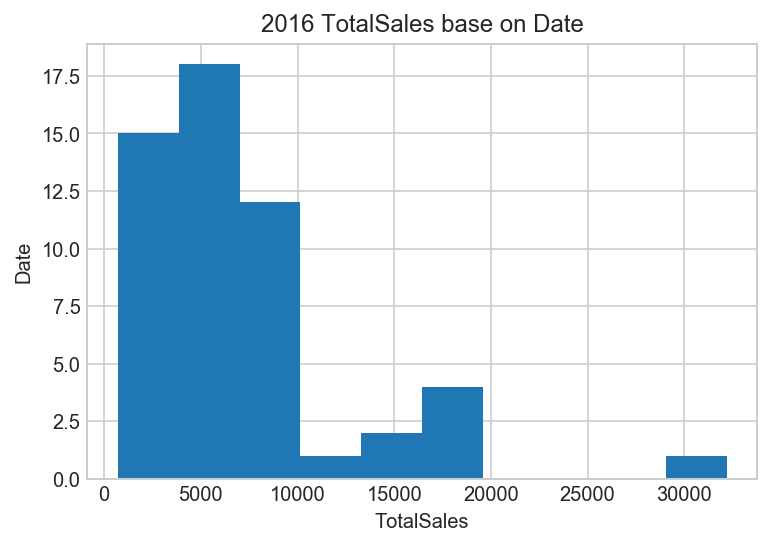

In [227]:
# Histogramm plot showing total sales and date in 2016
df2.groupby(['Date'])['TotalSales'].max().sort_values(ascending=False).plot('hist', title = '2016 TotalSales base on Date')
plt.xlabel('TotalSales')
plt.ylabel('Date')

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
df1.sort_values(by='TotalSales', ascending=False).head(2) # 2015 Total sales by Vendors and in what county

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons,ProfitBottle
32769,2015-10-01,2633,DES MOINES,50320,77.0,Polk,1011300.0,TENNESSEE WHISKIES,85,26827,Jack Daniels Old #7 Black Lbl,1000,18.38,27.57,1320,36392.40,1320.0,348.71,12130.80
22873,2015-11-18,4677,CORALVILLE,52241,52.0,Johnson,1032080.0,IMPORTED VODKA,35,34425,Grey Goose Vodka,1750,35.42,53.13,552,29327.76,966.0,255.19,9775.92


In [230]:
df1 = df1.drop(['ItemDescription','City','StoreNum', 'ZipCode', 'CountyNum','BottleVolml','Category', 'ItemNum','VolumeSoldGallons'], axis=1)

In [231]:
df1.head() # dropping unnecessary Variables in 2015 dataframe

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
0,2015-11-04,Bremer,APRICOT BRANDIES,55,4.50,6.75,12,81.00,9.00,27.00
1,2015-08-18,Wright,VODKA 80 PROOF,297,7.20,10.80,12,129.60,21.00,43.20
2,2015-04-20,Linn,AMERICAN DRY GINS,205,13.32,19.98,6,119.88,10.50,39.96
3,2015-08-05,Wapello,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,29.97,2.25,9.99
4,2015-06-25,Cerro Gordo,CANADIAN WHISKIES,65,15.75,23.63,2,47.26,3.50,15.76


In [232]:
df1.VendorNum.unique()  # checking the uniqueness of Vendor Num column

array([ 55, 297, 205,  85,  65, 380, 434, 971, 115, 260, 395, 192, 285,
       330,  35, 305, 421, 240, 322, 370, 259, 461, 384, 255, 209, 125,
       301, 410, 492, 389, 300, 420, 277, 294, 394, 154, 184, 130, 121,
       163, 229, 208, 308, 267,  86, 306, 359, 381, 100,  10, 112, 239,
       478, 346, 313, 451, 195, 978, 977, 803, 885,  91, 357, 962, 284,
       460, 469, 110, 497, 166, 122, 207, 116, 375, 969, 338, 246, 226,
       287, 250, 399, 295, 107, 315, 418,  80, 198, 206, 391, 390, 373,
       101, 413, 310, 268, 136, 495, 452, 503, 376, 477, 293, 446, 363,
       377, 224, 187, 432], dtype=int64)

In [233]:
sa_AVG = df1.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = False) # vendors with high sales on AVG daily

In [234]:
sa_AVG.sort_values(by='TotalSales', ascending=False)  # vendors with high sales on AVG daily

,VendorNum,TotalSales
58,310,936.360000
49,293,479.280000
22,166,460.740000
30,207,435.341667
78,391,396.668571
51,295,346.215000
100,503,334.152000
103,962,298.921915
54,301,270.498950
72,377,252.000000


In [235]:
sa_AVG2 = df1.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = True) # vendors with low sales on AVG daily

In [236]:
sa_AVG2.head()  # vendors with low sales on AVG daily

,VendorNum,TotalSales
71,376,23.790000
57,308,38.167810
101,803,40.002258
50,294,40.988889
106,977,42.188333


In [237]:
df1.groupby(['VendorNum'], as_index= False)['ProfitBottle'].mean().sort_values(by='ProfitBottle', ascending=False) # Vendor with high Avg profit for 2015

,VendorNum,ProfitBottle
58,310,312.120000
49,293,160.000000
22,166,153.580000
30,207,145.113889
78,391,132.231429
51,295,115.395000
100,503,111.384000
103,962,99.648511
54,301,90.188643
72,377,84.000000


In [238]:
df1['BottlesSold'].count()  # number of bottles sold for the year 2015

218594

In [239]:
df1[df1['BottlesSold'] == 2508]  # County where most bottles were sold in a day for 2015

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
28136,2015-06-15,Linn,VODKA 80 PROOF,55,3.97,5.96,2508,14947.68,2508.0,4990.92


In [240]:
D_avg1 = df1.groupby(['County'], as_index = False)['BottlesSold'].mean().sort_values(by=['BottlesSold'], ascending=True)  # County with least AVG daily bottle sale

In [241]:
D_avg1  # County with least AVG daily bottle sale for 2015

,County,BottlesSold
1,Adams,3.989418
65,Mitchell,4.039168
86,Taylor,4.087336
66,Monona,4.297915
42,Harrison,4.639610
53,Keokuk,4.692857
73,Palo Alto,4.858657
52,Jones,5.003139
21,Clayton,5.081935
25,Davis,5.111765


In [242]:
D_avg2 = df1.groupby(['County'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].mean().sort_values(by=['BottlesSold'], ascending=False)  # County with most AVG daily bottle sale

In [243]:
D_avg2.head()  # Counties with most AVG daily bottle sales for 2015

,County,BottlesSold,TotalSales,ProfitBottle
35,Fremont,14.272727,120.656818,40.311818
24,Dallas,13.330296,228.193754,76.431909
81,Scott,12.511786,152.481619,50.919619
76,Polk,11.986219,161.884558,54.090624
6,Black Hawk,11.795181,130.639050,43.662074


In [244]:
df1.groupby(['County'], as_index = False).sum().sort_values(by=['BottlesSold'], ascending=False).head(5)  # County with most daily bottle sale

,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
76,Polk,10143222,402422.50,604309.28,474031,6402210.51,413994.69,2139175.98
56,Linn,4906100,181803.67,273018.70,202959,2606326.77,181821.59,870999.67
81,Scott,3440221,129524.00,194504.44,167733,2044168.58,133400.75,682628.41
6,Black Hawk,3110691,112759.05,169344.28,142934,1583084.01,108736.43,529097.01
51,Johnson,2762156,109616.75,164610.65,120606,1719917.10,105861.69,574499.31


In [245]:
df1.VendorNum.unique()

array([ 55, 297, 205,  85,  65, 380, 434, 971, 115, 260, 395, 192, 285,
       330,  35, 305, 421, 240, 322, 370, 259, 461, 384, 255, 209, 125,
       301, 410, 492, 389, 300, 420, 277, 294, 394, 154, 184, 130, 121,
       163, 229, 208, 308, 267,  86, 306, 359, 381, 100,  10, 112, 239,
       478, 346, 313, 451, 195, 978, 977, 803, 885,  91, 357, 962, 284,
       460, 469, 110, 497, 166, 122, 207, 116, 375, 969, 338, 246, 226,
       287, 250, 399, 295, 107, 315, 418,  80, 198, 206, 391, 390, 373,
       101, 413, 310, 268, 136, 495, 452, 503, 376, 477, 293, 446, 363,
       377, 224, 187, 432], dtype=int64)

In [246]:
df1.groupby(['VendorNum'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].sum().sort_values(by=['TotalSales'], ascending=False)

,VendorNum,BottlesSold,TotalSales,ProfitBottle
42,260,354920,6.241002e+06,2080900.31
3,65,163628,2.247045e+06,751845.95
68,370,124333,2.102432e+06,701202.28
5,85,96622,1.943460e+06,647983.01
13,115,191961,1.876058e+06,636683.39
88,434,232036,1.840987e+06,613986.39
86,421,133820,1.724851e+06,575739.07
1,35,84122,1.510778e+06,505062.09
2,55,131971,1.073514e+06,361714.74
80,395,65762,9.441553e+05,314761.83


In [247]:
# Venedors Total sales for the year 2015 and total bottles sold.

In [248]:
df1.head()

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
0,2015-11-04,Bremer,APRICOT BRANDIES,55,4.50,6.75,12,81.00,9.00,27.00
1,2015-08-18,Wright,VODKA 80 PROOF,297,7.20,10.80,12,129.60,21.00,43.20
2,2015-04-20,Linn,AMERICAN DRY GINS,205,13.32,19.98,6,119.88,10.50,39.96
3,2015-08-05,Wapello,AMERICAN GRAPE BRANDIES,85,6.66,9.99,3,29.97,2.25,9.99
4,2015-06-25,Cerro Gordo,CANADIAN WHISKIES,65,15.75,23.63,2,47.26,3.50,15.76


In [249]:
df2.sort_values(by='TotalSales', ascending=False).head(2) # Vendors daily sales TotalSales for 2016

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons,ProfitBottle
28915,2016-01-15,3814,WEST DES MOINES,50266,25.0,Dallas,1031080.0,VODKA 80 PROOF,301,38177,Titos Handmade Vodka,1000,11.92,17.88,1800,32184.0,1800.0,475.51,10728.0
51532,2016-01-07,2633,DES MOINES,50320,77.0,Polk,1032080.0,IMPORTED VODKA,35,34422,Grey Goose Vodka,1000,22.50,33.75,528,17820.0,528.0,139.48,5940.0


In [250]:
df2 = df2.drop(['ItemDescription','CategoryName','City','StoreNum', 'ZipCode', 'CountyNum','BottleVolml','Category', 'ItemNum','VolumeSoldGallons'], axis=1)

In [251]:
df2.head(2)  # dropping some column that redundant to my analysis

,Date,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
0,2016-03-02,Scott,395,13.75,20.63,2,41.26,1.5,13.76
1,2016-02-11,Black Hawk,65,12.59,18.89,24,453.36,24.0,151.20


In [252]:
sa_AVG22 = df2.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = False) # vendors with high sales on AVG daily

In [253]:
sa_AVG22.sort_values(by='TotalSales', ascending=False).head(3)  # vendors with high sales on AVG daily for year 2016

,VendorNum,TotalSales
31,224,685.44
64,377,630.00
85,497,560.40


In [254]:
sa_AVG23 = df2.groupby(['VendorNum'], as_index= False)['TotalSales'].mean().sort_values(by= 'TotalSales',ascending = True) # vendors with low sales on AVG daily

In [255]:
sa_AVG23.head()  # vendors with low sales on AVG daily

,VendorNum,TotalSales
15,122,11.19000
32,226,17.39000
52,308,26.96875
28,209,30.04200
73,418,31.50000


In [256]:
df2.groupby(['VendorNum'], as_index= False)['ProfitBottle'].mean().sort_values(by='ProfitBottle', ascending=True) # Vendor with least profit for 2016

,VendorNum,ProfitBottle
15,122,3.730000
32,226,5.800000
52,308,9.000000
28,209,10.014000
73,418,10.500000
9,101,10.925000
63,376,11.420000
60,359,13.426000
14,121,14.875000
42,284,15.006000


In [257]:
df2.groupby(['VendorNum'], as_index= False)['ProfitBottle'].mean().sort_values(by='ProfitBottle', ascending=False) # Vendor with high Avg profit for 2016

,VendorNum,ProfitBottle
31,224,228.480000
64,377,210.000000
85,497,186.840000
77,446,139.000000
6,90,136.080000
58,356,120.000000
49,301,113.476390
20,161,106.800000
78,448,105.000000
13,116,93.866667


In [258]:
df2['BottlesSold'].count()  # number of bottles sold for the year 2016

52361

In [259]:
df2[df2['BottlesSold'] == 1800]  # the day with the best number of bottle sold and what county

,Date,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
28915,2016-01-15,Dallas,301,11.92,17.88,1800,32184.0,1800.0,10728.0


In [260]:
D_avg22 = df2.groupby(['County'], as_index = False)['BottlesSold'].mean().sort_values(by=['BottlesSold'], ascending=True)  # County with least AVG daily bottle sale

In [261]:
D_avg22.head()  # County with least AVG daily bottle sale in 2016

,County,BottlesSold
1,Adams,4.466667
52,Jones,4.551601
21,Clayton,4.570281
65,Mitchell,4.590674
80,Sac,4.702703


In [262]:
D_avg23 = df2.groupby(['County'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].mean().sort_values(by=['BottlesSold'], ascending=False)  # County with most AVG daily bottle sale

In [263]:
D_avg23.head()  # County with most AVG daily bottle sales in 2016

,County,BottlesSold,TotalSales,ProfitBottle
24,Dallas,14.551657,243.976433,81.422807
23,Crawford,14.253968,200.159418,68.420476
55,Lee,13.011009,182.444550,60.843046
27,Delaware,12.992308,171.058077,57.398154
33,Floyd,11.941799,148.772011,49.746138


In [264]:
df2.groupby(['County'], as_index = False).sum().sort_values(by=['BottlesSold'], ascending=False).head(50)  # County with most daily bottle sale

,County,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
76,Polk,2475910,95588.07,143447.73,107383,1383147.02,89625.85,461528.69
56,Linn,1108594,41178.19,61796.89,43377,544102.21,37766.30,181582.13
81,Scott,847342,31066.94,46620.78,37782,424554.73,29421.67,141647.56
6,Black Hawk,755396,28473.61,42729.94,30301,353707.78,23491.54,118022.92
51,Johnson,644324,25724.66,38604.55,27662,371388.76,24629.60,123922.84
77,Pottawattamie,449076,17273.25,25920.92,18958,267327.82,16827.99,89177.93
96,Woodbury,425191,16167.57,24262.21,18304,252574.99,16986.06,84422.20
30,Dubuque,366682,15261.54,22905.12,14562,193566.86,13760.57,64611.03
84,Story,456171,18039.28,27074.43,13307,188038.23,12939.99,62784.60
82,Shelby,274784,10088.78,15137.63,9897,116887.71,7584.23,39035.28


In [265]:
df2.groupby(['VendorNum'], as_index = False)['TotalSales'].sum().sort_values(by=['TotalSales'], ascending=False).head(2) # vendors with the most total sales for 2015

,VendorNum,TotalSales
38,260,1344222.64
3,65,529617.81


Text(0,0.5,'BottlesSold')

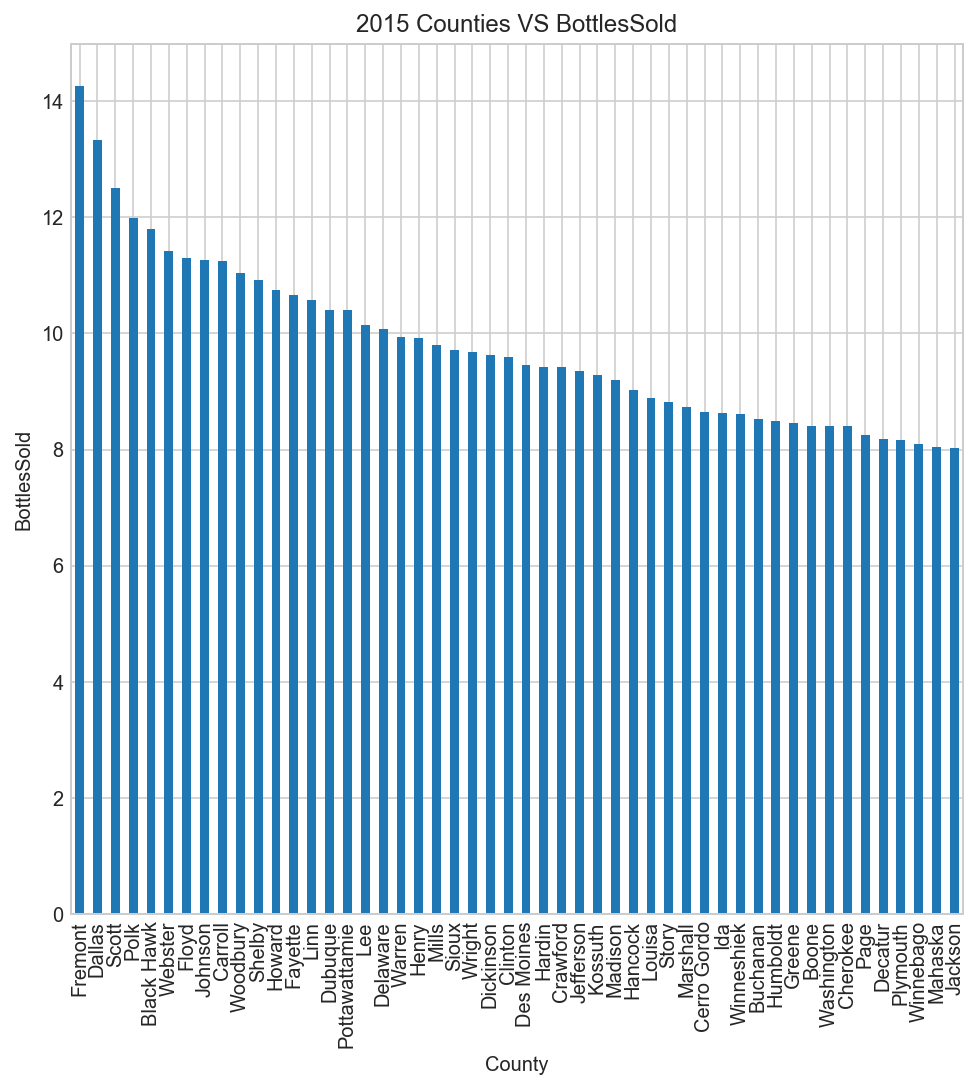

In [266]:
# Barchart Plot of Counties and AVG most Bottles Sold in 2015
fig, ax = plt.subplots(figsize = (8, 8))
df1.groupby('County')['BottlesSold'].mean().sort_values(ascending=False).head(50).plot('bar', ax = ax, title = '2015 Counties VS BottlesSold')
plt.xlabel('County')
plt.ylabel('BottlesSold')

Text(0,0.5,'BottlesSold')

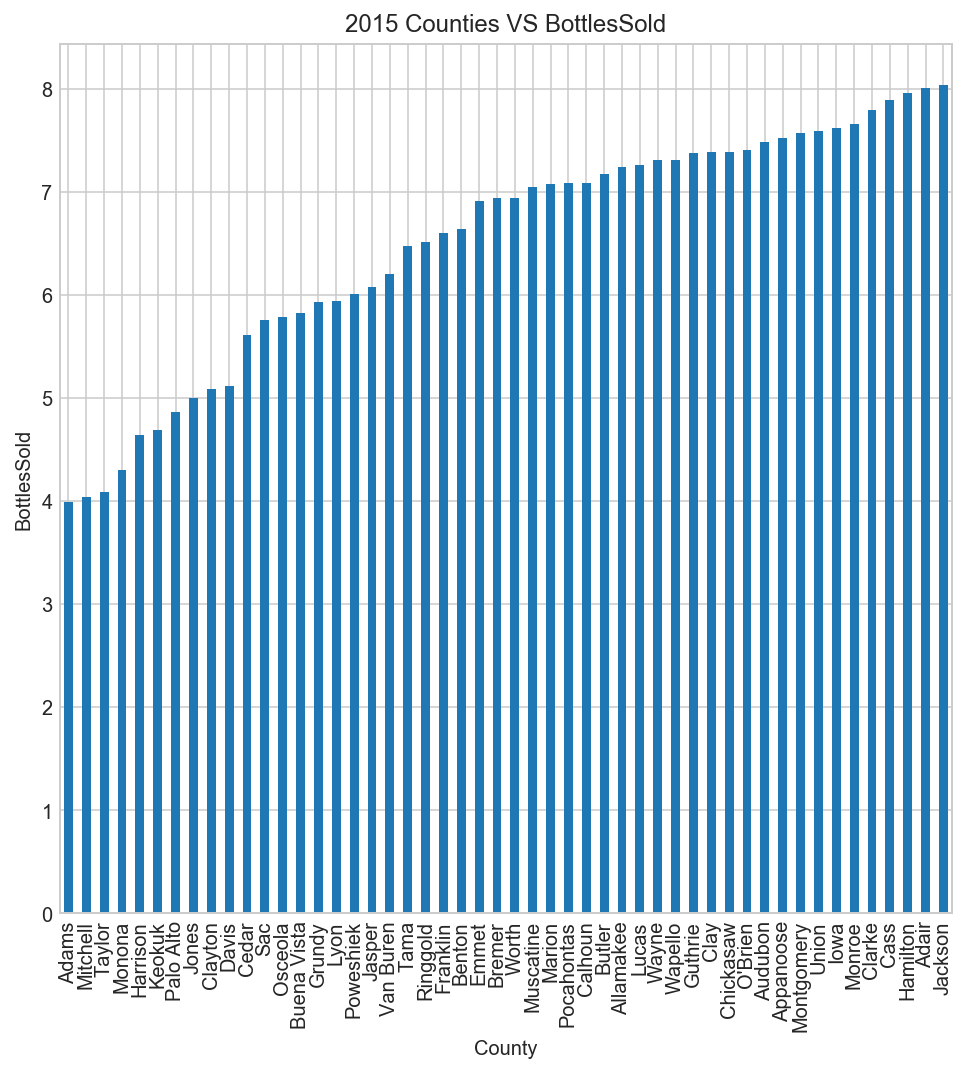

In [267]:
# Plot of Counties and the least AVG Bottles Sold in 2015
fig, ax = plt.subplots(figsize = (8, 8))
df1.groupby('County')['BottlesSold'].mean().sort_values(ascending=True).head(50).plot('bar', ax = ax, title = '2015 Counties VS BottlesSold')
plt.xlabel('County')
plt.ylabel('BottlesSold')

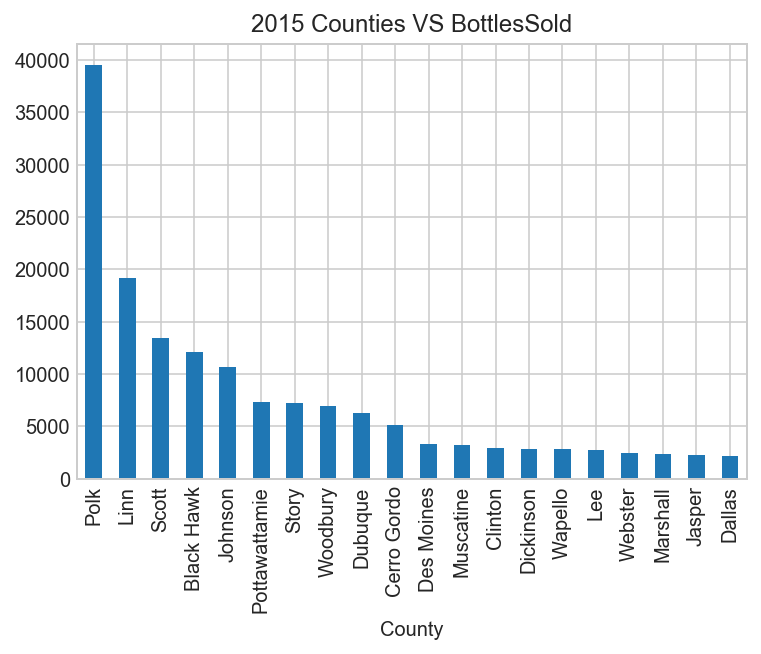

In [268]:
df1.groupby('County')['BottlesSold'].count().sort_values(ascending = False).head(20).plot(kind= 'bar',title ='2015 Counties VS BottlesSold')

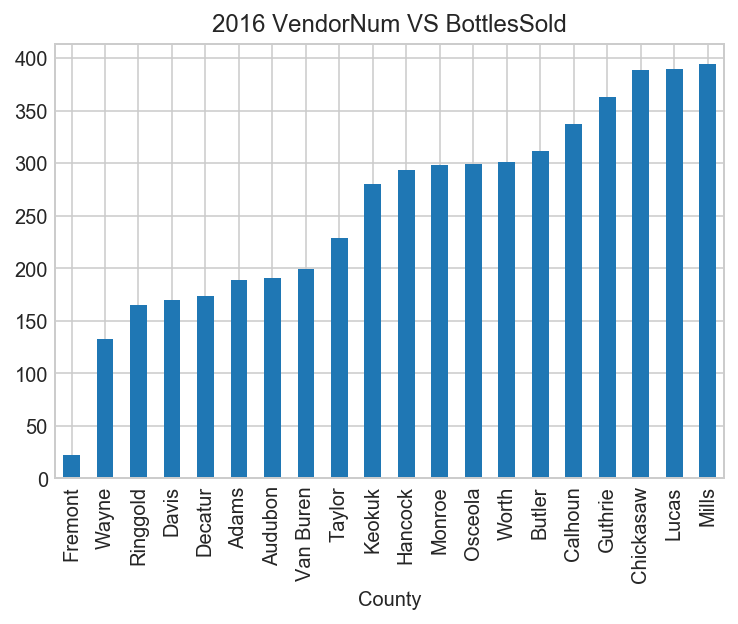

In [269]:
df1.groupby('County')['BottlesSold'].count().sort_values(ascending = True).head(20).plot(kind= 'bar', title='2016 VendorNum VS BottlesSold')

Text(0,0.5,'VendorNum')

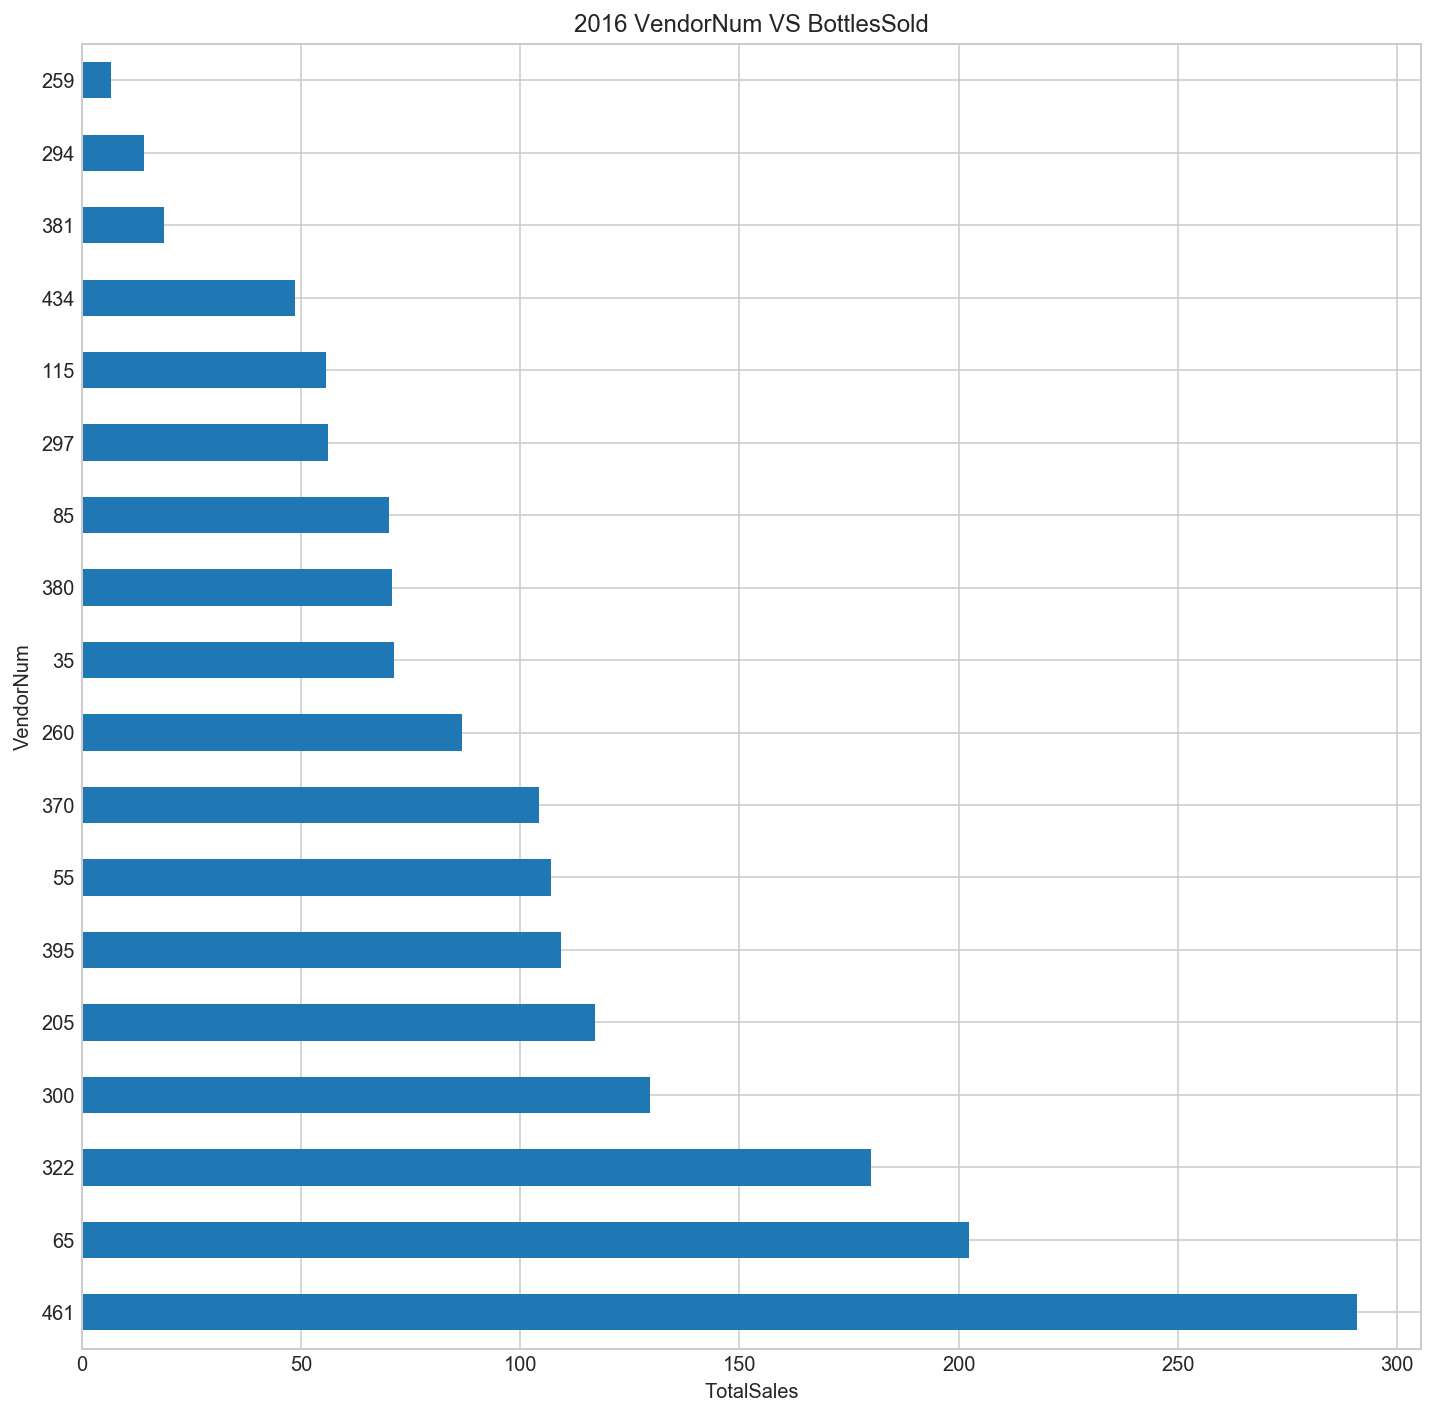

In [270]:
# Horizontal plot showing VendorNum and Total Sales in 2015
fig, ax = plt.subplots(figsize=(12,12))
df2.iloc[0:50, :].groupby('VendorNum')['TotalSales'].mean().sort_values(ascending=False).plot(kind='barH', ax=ax, title='2016 VendorNum VS BottlesSold')
plt.xlabel('TotalSales')
plt.ylabel('VendorNum')

In [271]:
df1.groupby('Date')['TotalSales'].count().sort_values(ascending = False).head(2)  # date with most sales in 2015 by a vendor

Date
2015-12-01    1555
2015-11-30    1553
Name: TotalSales, dtype: int64

In [272]:
df1.groupby('Date')['TotalSales'].mean().sort_values(ascending = False).head(2)  # date with most total sales on AVG in 2015

Date
2015-06-12    499.68
2015-06-05    476.57
Name: TotalSales, dtype: float64

In [273]:
df2.groupby('Date')['TotalSales'].count().sort_values(ascending = False).head(2)  # date with most sales by vendors in 2016

Date
2016-01-04    1311
2016-01-25    1296
Name: TotalSales, dtype: int64

In [274]:
df2.groupby('Date')['TotalSales'].mean().sort_values(ascending = False).head(2) # date with most sales on AVG in 2016

Date
2016-03-04    708.240000
2016-01-15    189.833775
Name: TotalSales, dtype: float64

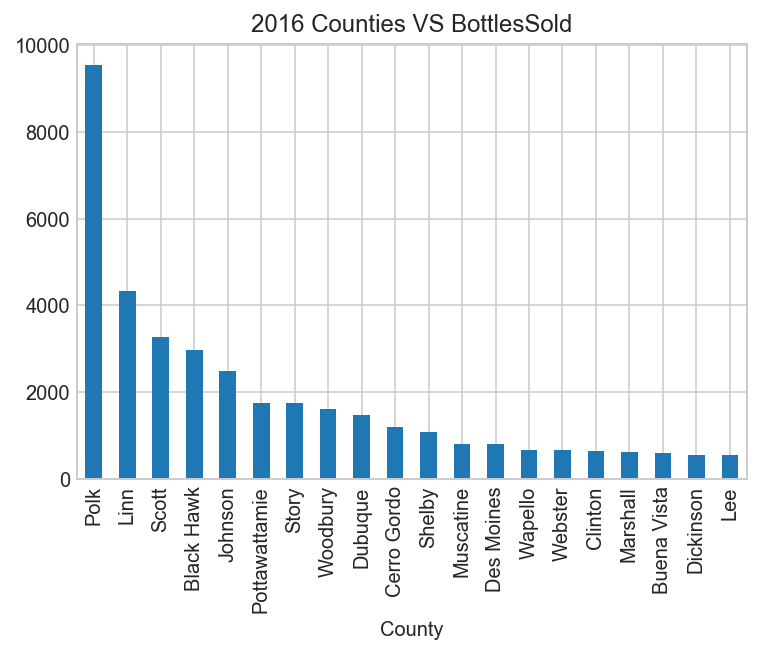

In [275]:
df2.groupby('County')['BottlesSold'].count().sort_values(ascending = False).head(20).plot(kind= 'bar',title ='2016 Counties VS BottlesSold')

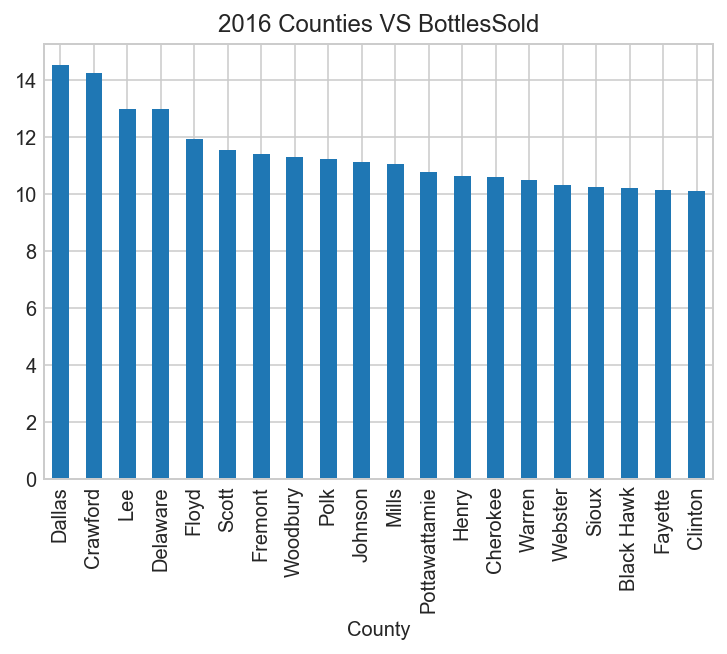

In [276]:
df2.groupby('County')['BottlesSold'].mean().sort_values(ascending = False).head(20).plot(kind= 'bar',title ='2016 Counties VS BottlesSold')

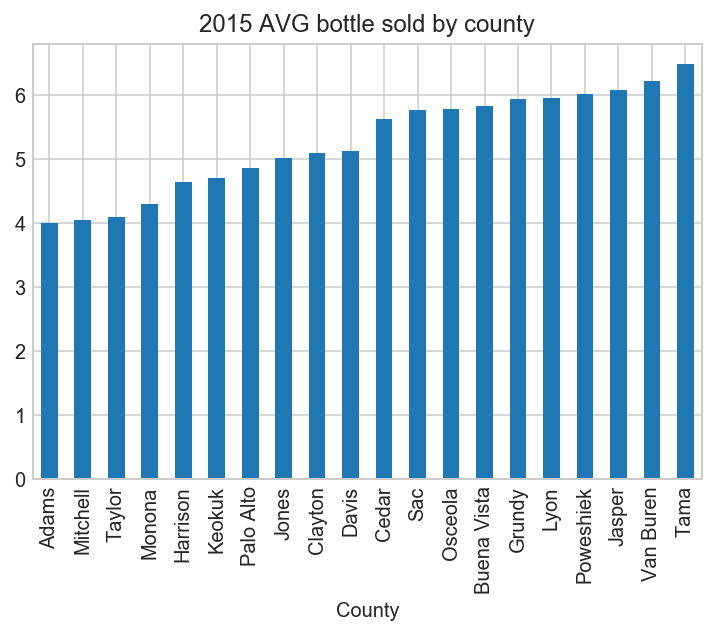

In [277]:
df1.groupby('County')['BottlesSold'].mean().sort_values(ascending = True).head(20).plot(kind= 'bar', title = '2015 AVG bottle sold by county') # base on avg 2015

Text(0,0.5,'Date')

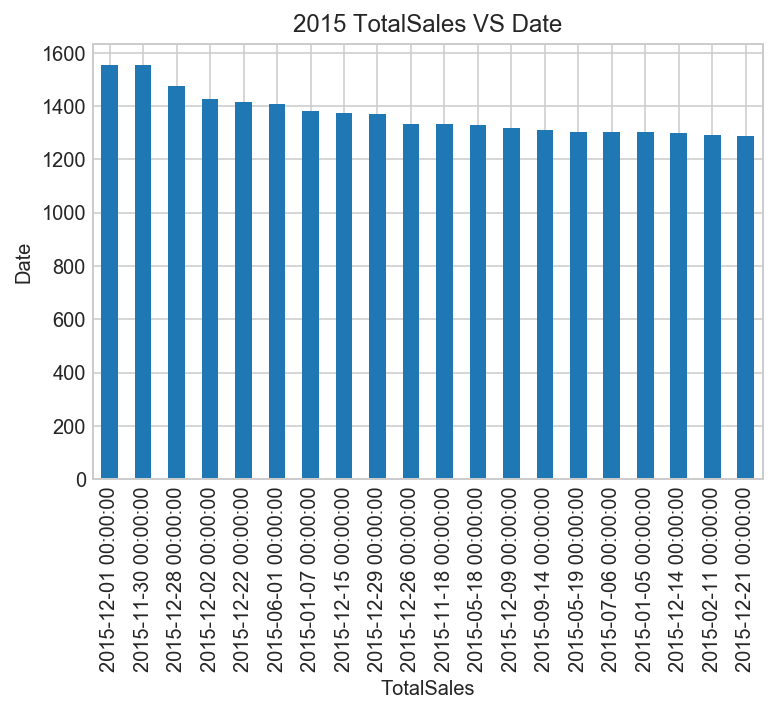

In [278]:
df1.groupby('Date')['TotalSales'].count().sort_values(ascending = False).head(20).plot('bar',  title = '2015 TotalSales VS Date')
plt.xlabel('TotalSales')
plt.xlabel('TotalSales')
plt.ylabel('Date')  # Total Sales base on count in 2015

Text(0,0.5,'TotalSales')

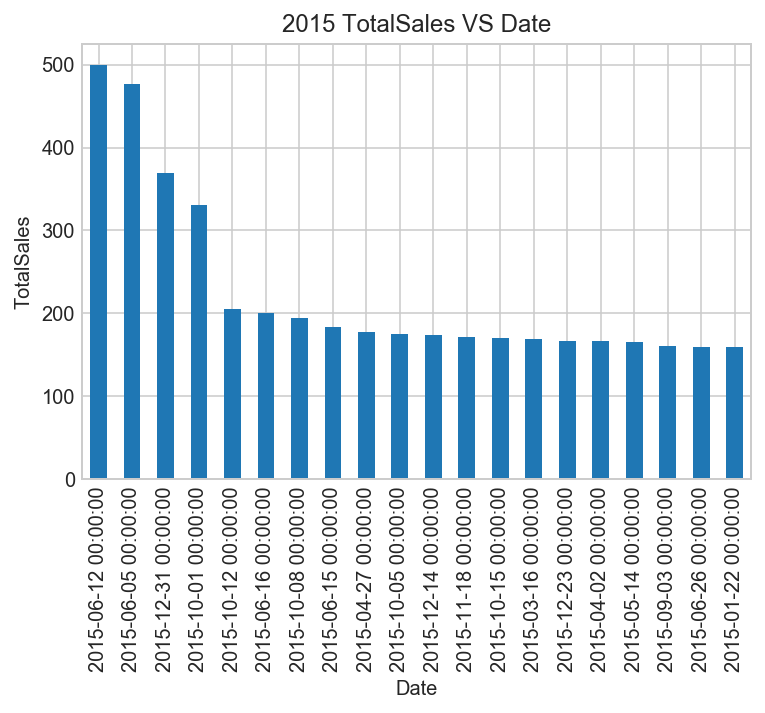

In [279]:
df1.groupby('Date')['TotalSales'].mean().sort_values(ascending = False).head(20).plot('bar', title = '2015 TotalSales VS Date')
plt.xlabel('Date')
plt.ylabel('TotalSales')  # Total sales based on avg 2015

Text(0,0.5,'BottlesSold')

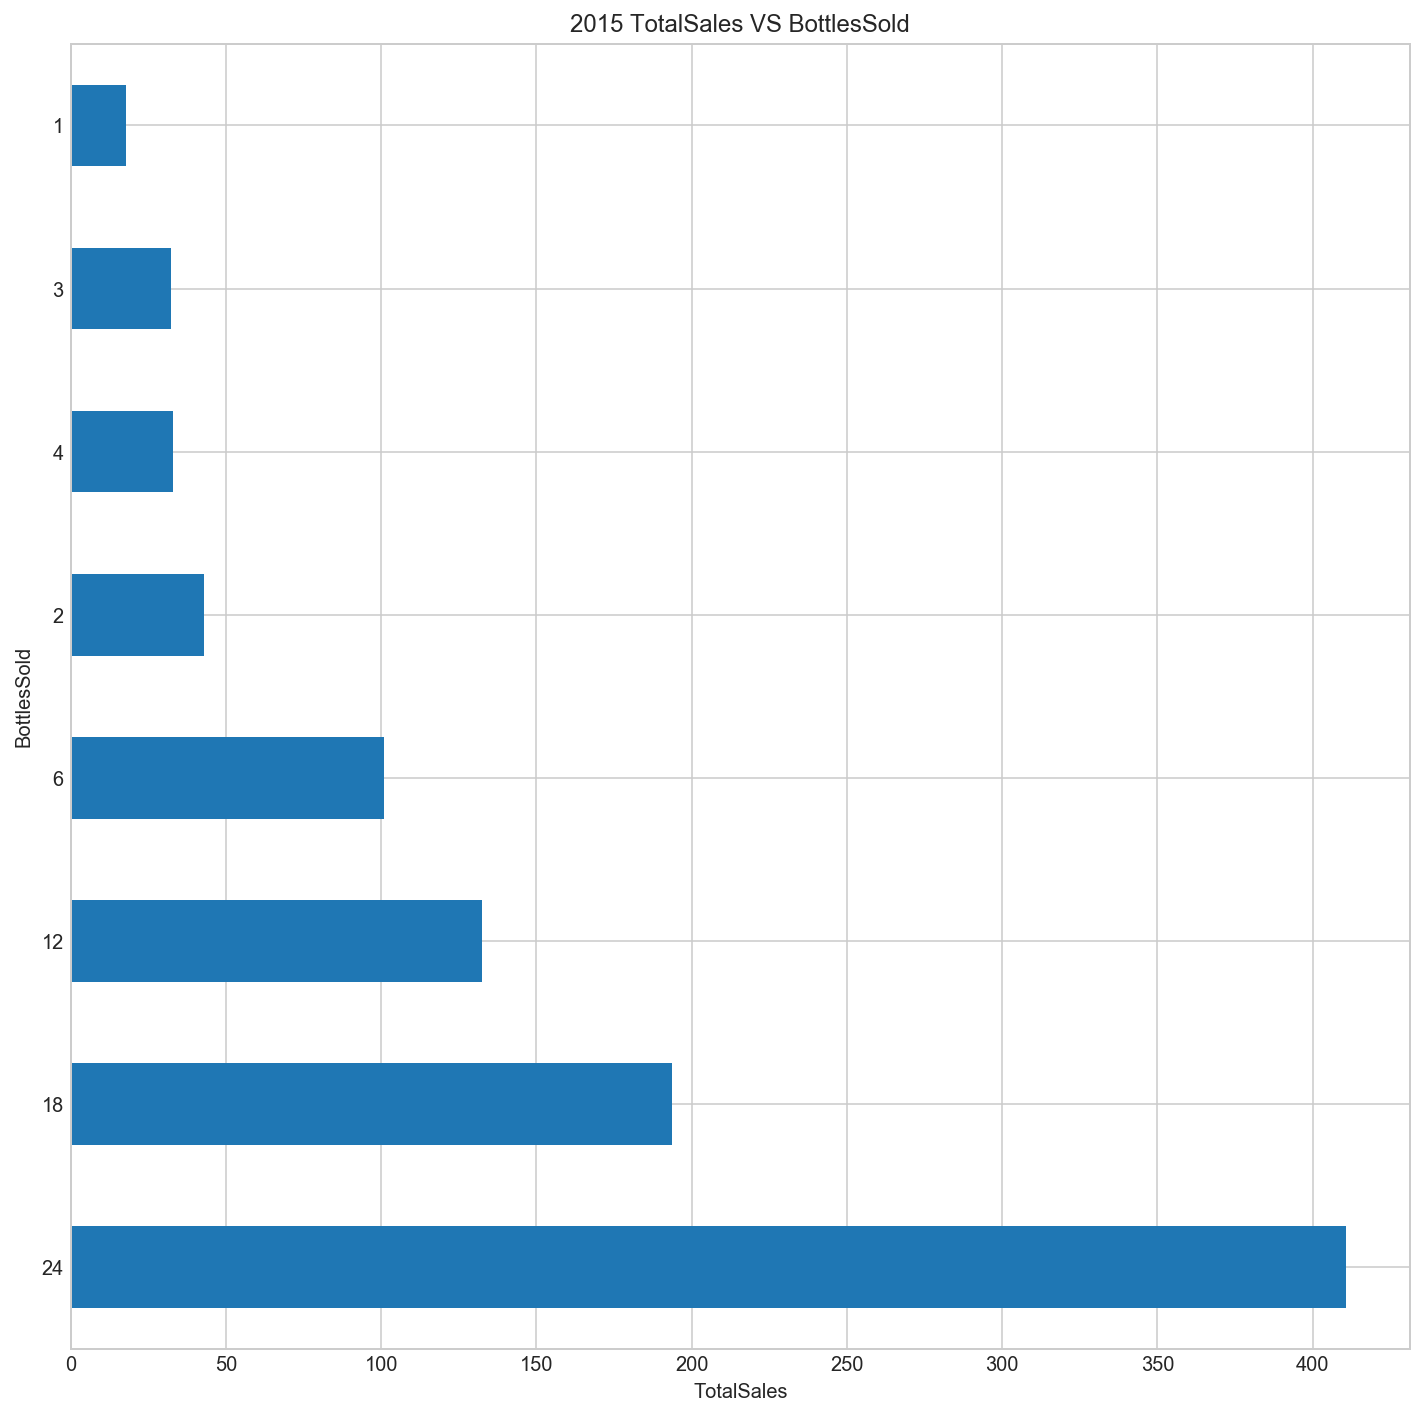

In [280]:
# Horizontal plot showing BottlesSold and TotalSales in 2015
fig, ax = plt.subplots(figsize=(12,12))
df1.iloc[0:50, :].groupby('BottlesSold')['TotalSales'].mean().sort_values(ascending=False).plot(kind='barH', ax=ax, title='2015 TotalSales VS BottlesSold')
plt.xlabel('TotalSales')
plt.ylabel('BottlesSold')

Text(0,0.5,'BottlesSold')

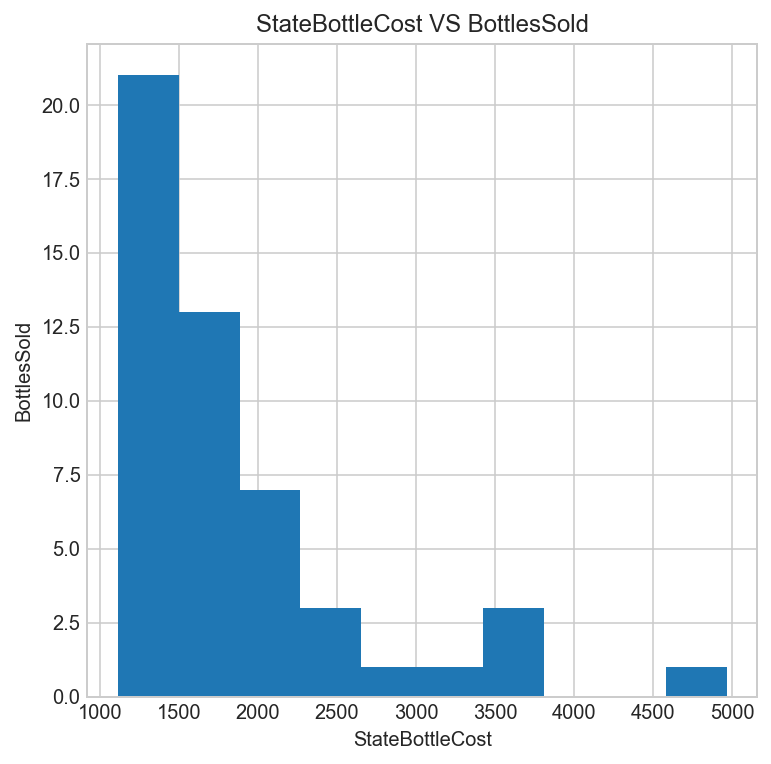

In [281]:
# Horizontal plot of StateBottleCost and BottlesSold observations.
fig, ax = plt.subplots(figsize = (6, 6))
df1.groupby('StateBottleCost')['BottlesSold'].count().sort_values(ascending=False).head(50).plot('hist', ax = ax, title = 'StateBottleCost VS BottlesSold')
plt.xlabel('StateBottleCost')
plt.ylabel('BottlesSold')

Text(0,0.5,'BottlesSold')

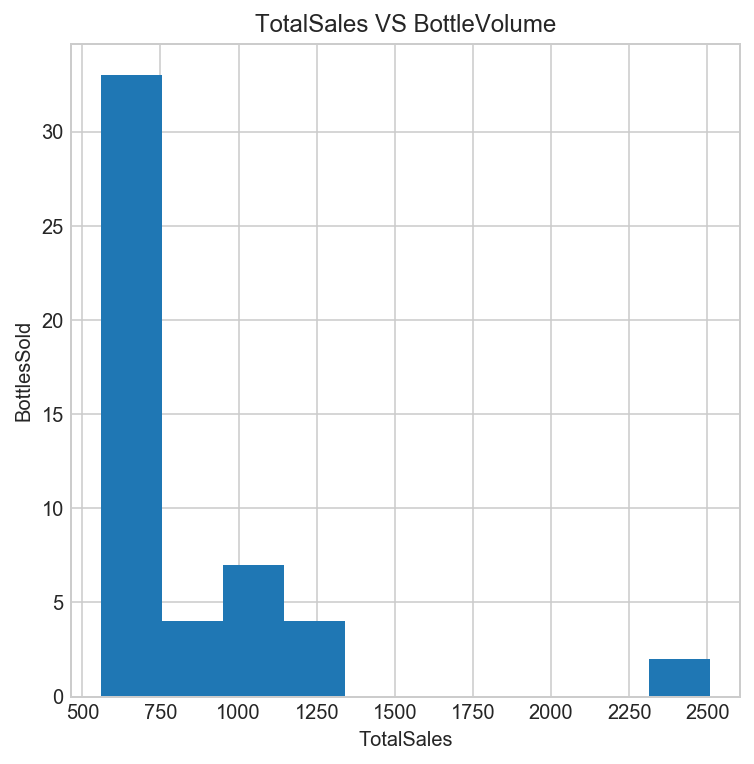

In [399]:
# Horizontal plot of TotalSales Vs BottlesSold observation.
fig, ax = plt.subplots(figsize = (6, 6))
df1.groupby('TotalSales')['BottlesSold'].mean().sort_values(ascending=False).head(50).plot('hist', ax = ax, title = 'TotalSales VS BottleVolume')
plt.xlabel('TotalSales')
plt.ylabel('BottlesSold')

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


1. ligquor with highest state cost price sales very low, this is true because the higher the price less it sales off the shelve. so so it cost more to buy liquor with high state cost price abd it's 0.75 litres and vendors tend to sale at a very high price and people rarely buys them. 

2. I created a new column which calculates the profit made by each vendor and i was hoping to make it my target variable such dependent variable can be considered when making changes by the iowa state govt.

3. so i plotted a histogramm to understand sales base on date and it seem most sales happened during  middle of the year

4. so looking at the sales of each vendor in 2015, it was made around August 2015 in polk county and the state cost was 18.38 and sold most bottles too.

5. 218594 bottles were sold for the entire year of 2015 80% of which falls below avergae state bottle cost meaning cheaper liquor sales off more compared to ones with high price.

6. Linn county has the most bottle sold in a day and that makes sense due to the state cost for the said bottle so people can easily afford it.

7. So adam county sold the less on average in terms of how many bottle sold and on the average Fermont did so well based on bottles sold but it doesn't make them highest in profit or sales in dollars, but on just sum polk county made the most bottle sales, sales in dollars and in profit

8. So in 2016 on average Dallas county sold more bottles but when it comes to sum up sales polk county came first, so i decided to look further just to understand these trend with polk county and found out they are the largest county in iowa which explains why they sell more and have more vendors, however the more vendor they have the sales spreads out.

9. i noticed that state bottle that has the highest state cost in dollars retailed at 637.50 only which make sense the vendor don't sell them often and so it's pricy so they try to maximize profit when they do sell it so one vendor seem to makes this sale. 
   





# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [283]:
df15 = df1.loc[(df1['Date'] >= '2015-01-01') & (df1['Date'] < '2015-03-31')].copy()  # Subsetting df .Split from Jan to March of 2015 

In [284]:
df15.head()

,Date,County,CategoryName,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
8,2015-01-22,Scott,CANADIAN WHISKIES,65,8.92,13.38,1,13.38,1.75,4.46
12,2015-03-04,Scott,CANADIAN WHISKIES,434,9.97,14.96,6,89.76,10.50,29.94
13,2015-01-16,Linn,VODKA FLAVORED,971,14.25,21.38,2,42.76,1.50,14.26
14,2015-01-13,Tama,CANADIAN WHISKIES,115,5.23,7.85,12,94.20,9.00,31.44
15,2015-03-24,Sioux,BLENDED WHISKIES,260,7.00,10.50,12,126.00,9.00,42.00


In [285]:
df15.describe()  # Statistical summary of 2015 detaset

,VendorNum,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,ProfitBottle
count,48730.000000,48730.000000,48730.000000,48730.000000,48730.000000,48730.000000,48730.000000
mean,255.753191,9.655163,14.501423,9.548902,123.917826,8.685759,41.460995
std,141.910569,6.913955,10.370613,21.783813,346.678976,26.686943,116.830962
min,10.000000,0.970000,1.460000,1.000000,1.460000,0.100000,0.490000
25%,115.000000,5.500000,8.250000,2.000000,30.390000,1.500000,10.150000
50%,260.000000,7.940000,12.000000,6.000000,69.780000,5.250000,23.280000
75%,380.000000,11.750000,17.630000,12.000000,134.880000,10.500000,45.000000
max,978.000000,425.000000,637.500000,1164.000000,17378.520000,2037.000000,6087.720000


In [286]:
df15 = df15.groupby(['VendorNum','Date','County','VolumeSoldLiters','StateBottleRetail','StateBottleCost','ProfitBottle'], as_index = False)['BottlesSold','TotalSales','ProfitBottle'].sum().sort_values(by=['TotalSales'], ascending=False)

In [287]:
df15.head(3) # 2015  from Jan - March best perormed vendor by total sales

,VendorNum,Date,County,VolumeSoldLiters,StateBottleRetail,StateBottleCost,ProfitBottle,BottlesSold,TotalSales
12724,115,2015-02-23,Henry,2037.0,14.93,9.70,6087.72,1164,17378.52
23699,260,2015-02-26,Polk,576.0,27.75,18.50,5328.00,576,15984.00
22609,260,2015-02-16,Pottawattamie,525.0,47.99,31.99,4800.00,300,14397.00


In [288]:
df16 = df15.drop(['VendorNum','ProfitBottle'], axis = 1)  # dropping column that makes no meaning to me and assing to variable

In [289]:
df16.head()

,Date,County,VolumeSoldLiters,StateBottleRetail,StateBottleCost,BottlesSold,TotalSales
12724,2015-02-23,Henry,2037.0,14.93,9.70,1164,17378.52
23699,2015-02-26,Polk,576.0,27.75,18.50,576,15984.00
22609,2015-02-16,Pottawattamie,525.0,47.99,31.99,300,14397.00
25503,2015-03-18,Woodbury,816.0,17.63,11.75,816,14386.08
10776,2015-03-16,Linn,516.0,26.85,17.90,516,13854.60


In [290]:
df16.isnull().sum()  # checking for no null values

Date                 0
County               0
VolumeSoldLiters     0
StateBottleRetail    0
StateBottleCost      0
BottlesSold          0
TotalSales           0
dtype: int64

In [291]:
df16.groupby('County')['TotalSales'].count().sort_values(['TotalSales'].count('County'), ascending=False) # Counties with best sales

County
Polk             7985
Linn             3991
Scott            2796
Black Hawk       2523
Johnson          2226
Pottawattamie    1566
Story            1537
Woodbury         1450
Dubuque          1289
Cerro Gordo      1008
Des Moines        759
Muscatine         707
Clinton           641
Lee               641
Wapello           606
Jasper            523
Webster           521
Dickinson         506
Marshall          489
Dallas            472
Warren            467
Buena Vista       449
Marion            445
Bremer            408
Boone             384
Jones             360
Carroll           344
Poweshiek         325
Jackson           310
Iowa              306
                 ... 
Emmet             133
Clarke            132
Louisa            115
Wright            113
Delaware          113
Adair             106
Ida               102
Grundy            100
Pocahontas         96
Humboldt           96
Lucas              93
Mills              82
Chickasaw          82
Osceola            76
Cal

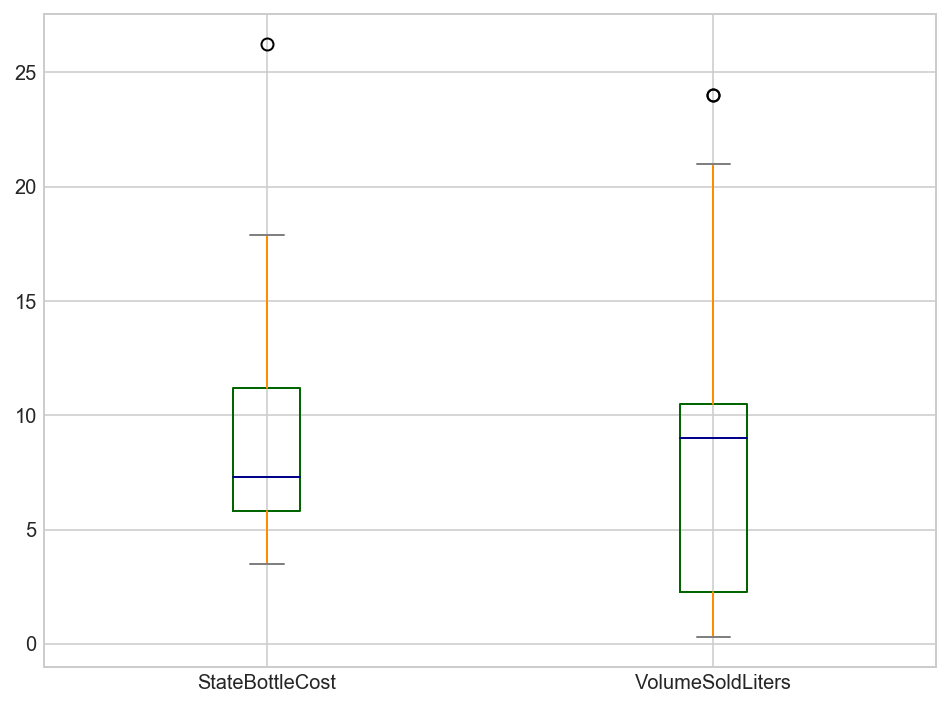

In [292]:
#Plot of StateBottleCost and VolumnSoldLiters on the same boxplot.
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
          medians='DarkBlue', caps='Gray')
fig, ax = plt.subplots(figsize = (8, 6))

df1[['StateBottleCost', 'VolumeSoldLiters']].head(20).plot.box(color = color, ax=ax)

In [293]:
rename_iow3 = {'Date': 'Date', 'Store Number': 'StoreNum', 'City': 'City', 'Zip Code': 'ZipCode', 'County Number': 'CountyNum',
             'County': 'County', 'Category': 'Category', 'Category Name': 'CategoryName', 'Vendor Number': 'VendorNum', 
             'Item Number': 'ItemNum', 'Item Description': 'ItemDescription', 'Bottle Volume (ml)': 'BottleVolml', 
              'State Bottle Cost':'StateBottleCost','State Bottle Retail':'StateBottleRetail','Bottles Sold':'BottlesSold',
'Sale (Dollars)':'TotalSales','Volume Sold (Liters)':'VolumeSoldLiters', 'Volume Sold (Gallons)':'VolumeSoldGallons'}

In [294]:
iowa.rename(columns=rename_iow3, inplace=True)  # Replacing column names to suitable ones
iowa.head(2)

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [295]:
null_mask = iowa['TotalSales'] # masking so as to be able to access the variable values and perform string strip
new_null = null_mask.str.strip('$')
new_null = [float(x) for x in new_null]

iowa['TotalSales'] = new_null


In [296]:
null_mask1 = iowa['StateBottleRetail']  # formating to floats from string object
new_null1 = null_mask1.str.strip('$')
new_null1 = [float(x) for x in new_null1]

iowa['StateBottleRetail'] = new_null1

In [297]:
null_mask2 = iowa['StateBottleCost']
new_null2 = null_mask2.str.strip('$')
new_null2 = [float(x) for x in new_null2]

iowa['StateBottleCost'] = new_null2

In [298]:
iowa.head()

,Date,StoreNum,City,ZipCode,CountyNum,County,Category,CategoryName,VendorNum,ItemNum,ItemDescription,BottleVolml,StateBottleCost,StateBottleRetail,BottlesSold,TotalSales,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [299]:
df01 = iowa[['Date','County','TotalSales']]  # creating a new datframe which i find to base analysis on

In [300]:
df01_15 = df01[df01['Date'] < '2016-01-01']  # filtering obersavation that occured in 2015
df01_16 = df01[df01['Date'] >= '2016-01-01']  # filtering obeservation that occured in 2016

In [301]:
df02 = df01_15

In [302]:
df02.groupby(['Date','County']).sum().head(1)  # summation of all sales done in january 2015
df2jan = df02[(df02['Date'] >= '2015-01-01') & (df02['Date'] < '2015-02-01')].sort_values('County').groupby('County').sum()
df2jan.columns = ['Jan']

In [303]:
df03 = df01_15
df03.groupby(['Date','County']).sum().head(1)   # summation of all sales done in Febuary 2015
df03feb = df03[(df03['Date'] >= '2015-02-01') & (df03['Date'] < '2015-03-01')].sort_values('County').groupby('County').sum()
df03feb.columns = ['Feb']

In [304]:
df04 = df01_15
df04.groupby(['Date','County']).sum().head(1)   # summation of all sales done in march 2015
df4march = df04[(df04['Date'] >= '2015-03-01') & (df04['Date'] < '2015-04-01')].sort_values('County').groupby('County').sum()
df4march.columns = ['March']


In [305]:
df05 = df01_15
df05.groupby(['Date','County']).sum().head(1)   # summation of all sales done in december 2015
df03 = df03.reset_index()
df5dec = df05[(df05['Date'] >= '2015-12-01') & (df05['Date'] < '2016-01-01')].sort_values('County').groupby('County').sum()
df5dec.columns = ['Total_yr']


In [306]:
df1_final = pd.concat([df2jan, df03feb, df4march, df5dec], axis = 1)  # concatenating all that sales in one datframe
df1_final = df1_final.reset_index()  
df1_final.head()

,index,Jan,Feb,March,Total_yr
0,Adair,3288.52,3659.62,3273.86,4334.71
1,Adams,473.31,537.34,1242.95,1392.41
2,Allamakee,5701.58,5040.82,4165.58,10191.60
3,Appanoose,3943.98,6377.56,4906.55,7697.33
4,Audubon,1026.95,2998.20,1485.60,2637.47


In [307]:
df1_final.shape  # checking thdimension of the df

(99, 5)

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [308]:
df1_final.isnull().sum()  # checking for null values 

index       0
Jan         0
Feb         1
March       0
Total_yr    0
dtype: int64

In [309]:
null_fed_mask = df1_final['Feb'].isnull()  # setting the null value to zero
df1_final.loc[null_fed_mask, 'Feb'] = 0

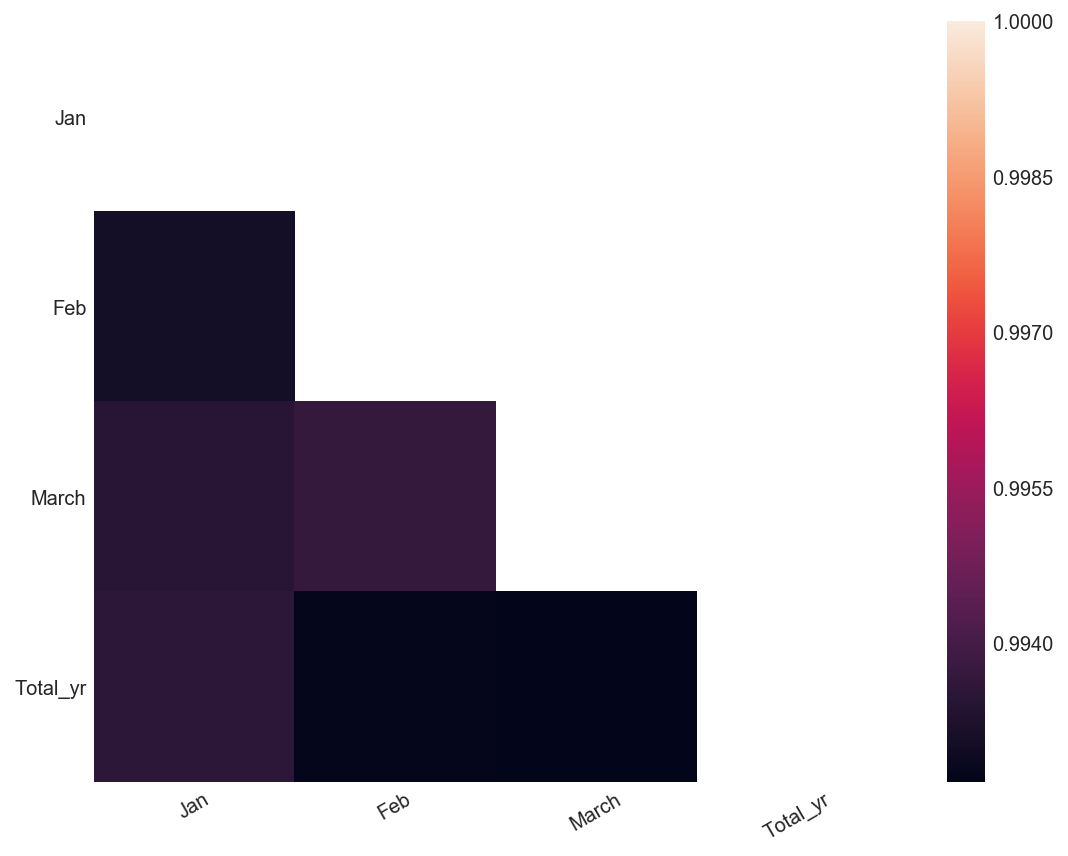

In [310]:
# A: Checking for correlation
mean_corr = df1_final.corr()
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn checking for correlation.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation = 30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation = 0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [311]:
df1_final.corr()  #correlation matrix

,Jan,Feb,March,Total_yr
Jan,1.000000,0.993050,0.993460,0.993539
Feb,0.993050,1.000000,0.993679,0.992722
March,0.993460,0.993679,1.000000,0.992658
Total_yr,0.993539,0.992722,0.992658,1.000000


In [312]:
df1_final.describe()

,Jan,Feb,March,Total_yr
count,99.000000,99.000000,99.000000,99.000000
mean,18767.683131,20584.883636,22806.987677,30875.319192
std,48193.287931,50290.211090,59435.659335,77497.880367
min,350.880000,0.000000,105.780000,156.840000
25%,3066.320000,3258.545000,3428.915000,5211.125000
50%,5639.520000,6291.310000,7517.650000,10174.310000
75%,11366.620000,15671.755000,14164.470000,17816.675000
max,417894.830000,419162.050000,503318.630000,647138.940000


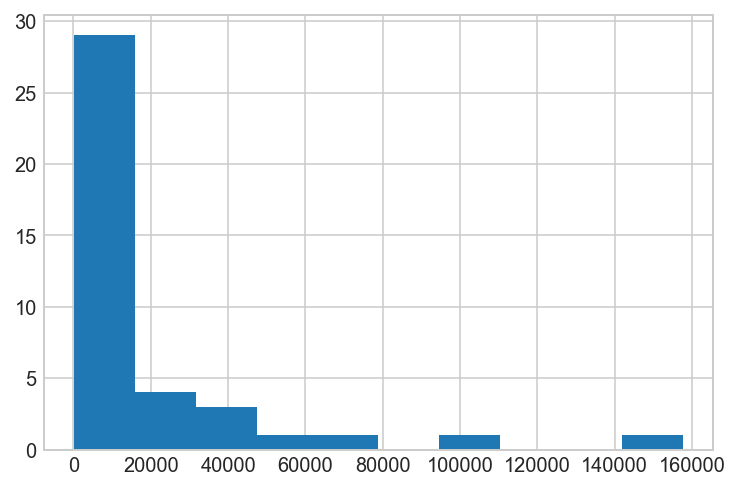

In [313]:
df1_final.Total_yr.head(40).hist(bins=10)  # Distribution of yearly total sales on histogram

In [314]:
df1_final.Total_yr.describe()  # desceiptive summary of yearly total sale

count        99.000000
mean      30875.319192
std       77497.880367
min         156.840000
25%        5211.125000
50%       10174.310000
75%       17816.675000
max      647138.940000
Name: Total_yr, dtype: float64

In [315]:
df1_final.sort_values('Total_yr', ascending=False).head()  # Total_yr with the most sales

,index,Jan,Feb,March,Total_yr
76,Polk,417894.83,419162.05,503318.63,647138.94
56,Linn,156214.06,185502.78,232747.54,265787.48
81,Scott,125229.08,138168.90,155017.29,257700.40
51,Johnson,105178.21,109596.05,107368.84,162288.38
6,Black Hawk,92212.03,121687.57,126967.48,157628.73


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [350]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [351]:
X = df1_final[['Jan','Feb','March']]  # First model with stats model with three independent variables as predictors
y = df1_final.Total_yr  # y is my target variable

In [396]:
# sklearn automaticaly adds the intercept (beta_0) but stats learn dont so i added a constant
import statsmodels.api as sm

X = df1_final[['Jan','Feb','March']].values
# manually add the intercept column
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = df1_final.Total_yr

In [397]:
model = sm.OLS(y, X)  # OLS stands for ordinary least squares = linear regression
model = model.fit()  # this train my model to the trainign data.  (x,y) are my training data
                      

In [398]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Total_yr   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3286.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           8.57e-96
Time:                        21:06:11   Log-Likelihood:                -1024.3
No. Observations:                  99   AIC:                             2057.
Df Residuals:                      95   BIC:                             2067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6899      0.159      4.344      0.000       0.375       1.005
x2             0.4672      0.155      3.018      0.003       0.160       0.774
x3             0.3458      0.135      2.561      0.012       0.078       0.614
const        424.4290    851.601      0.498      0.619   -1266.213    2115.071
==============================================================================
Omnibus:                      107.874   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2374.020
Skew:                           3.374   Prob(JB):                         0.00
Kurtosis:                      26.021   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For a 1-unit increase in Jan (holding constant Feb), there is a 0.6899 increase in Total_yr

For a 1-unit increase in Feb (holding constant Jan), there is a 0.4672 increase in Total_yr

A 1 unit increase in variable RM corresponds to a 0.3458 unit increase in the estimate of Total_yr

In [394]:
X1 = df1_final[['Jan','Feb']].values   # second stats model with two independet variables as predictor
X1 = np.concatenate([X1, np.ones((X1.shape[0], 1))], axis=1)
y1 = df1_final.Total_yr

# optionally, you can chain "fit()" to the model object
model = sm.OLS(y1, X1)
model = model.fit()  # this train my model to the trainign data.  (x,y) are my training data
pred = model.predict(X1) # also making predictions

model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Total_yr   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4656.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           2.65e-96
Time:                        21:01:56   Log-Likelihood:                -1027.6
No. Observations:                  99   AIC:                             2061.
Df Residuals:                      96   BIC:                             2069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8958      0.141      6.358      0.000       0.616       1.175
x2             0.6774      0.135      5.017      0.000       0.409       0.945
const        120.7296    867.386      0.139      0.890   -1601.019    1842.478
==============================================================================
Omnibus:                       89.952   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1676.405
Skew:                           2.583   Prob(JB):                         0.00
Kurtosis:                      22.486   Cond. No.                     8.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For a 1-unit increase in Jan (holding constant Feb), there is a 0.8958 increase in Total_yr

For a 1-unit increase in Feb (holding constant Jan), there is a 0.6774 increase in Total_yr


In [356]:
pred[0:5]   # predictions

array([ 5545.31223836,   908.67119747,  8642.38791212,  7973.46688397,
        3071.48451161])

In [387]:
lm = linear_model.LinearRegression()  # fitting linear Regression sklearn model with three predictor  

X2 = df1_final[['Jan','Feb','March']].values  # Third model
y2 = df1_final.Total_yr 

model = lm.fit(X2, y2)


score        =  model.score(X2, y2)


In [388]:
preds  =  model.predict(X2)

In [389]:
print("score: ", score)  

score:  0.990454280265


In [390]:
preds[0:5]  # predictions

array([ 5534.91971752,  1431.787561  ,  8153.29363816,  7821.45288606,
        3047.3241866 ])

In [391]:
print(model.coef_)  # model coefficients

[ 0.68989496  0.46718619  0.34577941]


In [361]:
X3 = df1_final[['Jan','Feb','March']]  # A linear Regression model with three predictor

y3 = df1_final.Total_yr    # Fourth model

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.5)  # 50-50 train/test split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(49, 3) (49,)
(50, 3) (50,)


In [377]:
slr = LinearRegression()
slr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [379]:
slr.score(X_test, y_test)

0.99177247541017088

In [381]:
y_pred[0:5]

array([  30473.72207935,   15598.41527449,    8542.29574698,
         15304.64236102,  651730.80737169])

In [382]:
print(model.coef_)

[ 0.68989496  0.46718619  0.34577941]


In [378]:
slr.score(X_train, y_train)

0.98214273753944581

In [380]:
y_pred = slr.predict(X_test)

In [157]:
X4 = df1_final[['Jan','Feb','March']]   # K-Folds Cross Validation in sklearn
y4 = df1_final.Total_yr   # Fift model

Cross-validated scores: [ 0.96445353  0.94778089  0.98890379  0.99251502  0.94210375]
Cross-Predicted R2: 0.984076194361


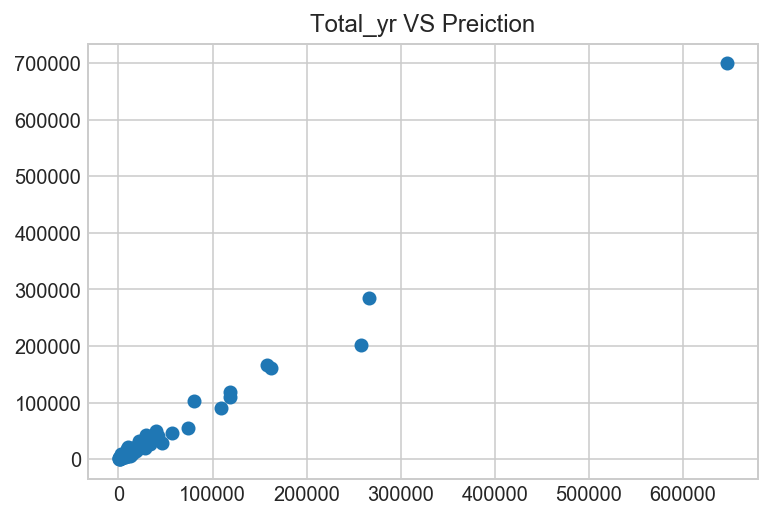

In [383]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform cross-validation with a five-fold split.
scores = cross_val_score(slr, X4, y4, cv=5)
print("Cross-validated scores:", scores)

# Make cross-validated predictions on the testing sets.
predictions = cross_val_predict(slr, X4, y4, cv=5)
plt.scatter(y4, predictions)
plt.title('Total_yr VS Preiction')

# Manually calculate the R2.
r2 = metrics.r2_score(y, predictions)
print("Cross-Predicted R2:", r2)

1.The model has an R2 of 0.964, which means that the three predictor variables I 
  have chosen explain 96.4% of the variance in the target variable not
 explained by the baseline model.

2.The model has an R2 of 0.948, which means that the three predictor variables I 
  have chosen explain 94.8% of the variance in the target variable not
  explained by the baseline model
3.The model has an R2 of 0.988, which means that the three predictor variables I 
  have chosen explain 98.8% of the variance in the target variable not
  explained by the baseline model
  
4.The model has an R2 of 0.992, which means that the three predictor variables I 
  have chosen explain 99.2% of the variance in the target variable not
  explained by the baseline model
  
5.The model has an R2 of 0.942, which means that the three predictor variables I 
  have chosen explain 94.2% of the variance in the target variable not
  explained by the baseline model

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

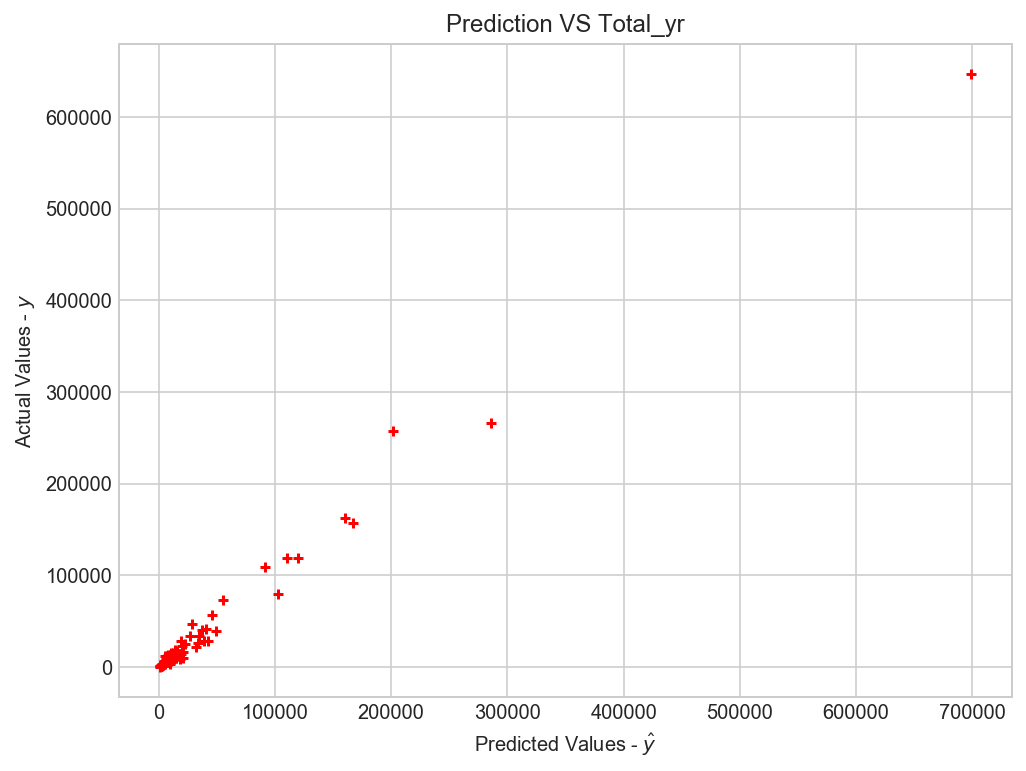

MSE: 94671094.4596


In [167]:
# Plot the model
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(8,6))
plt.scatter(predictions[0:500], y[0:500], s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.title('Prediction VS Total_yr')
plt.show()

print("MSE:", mean_squared_error(y, predictions))

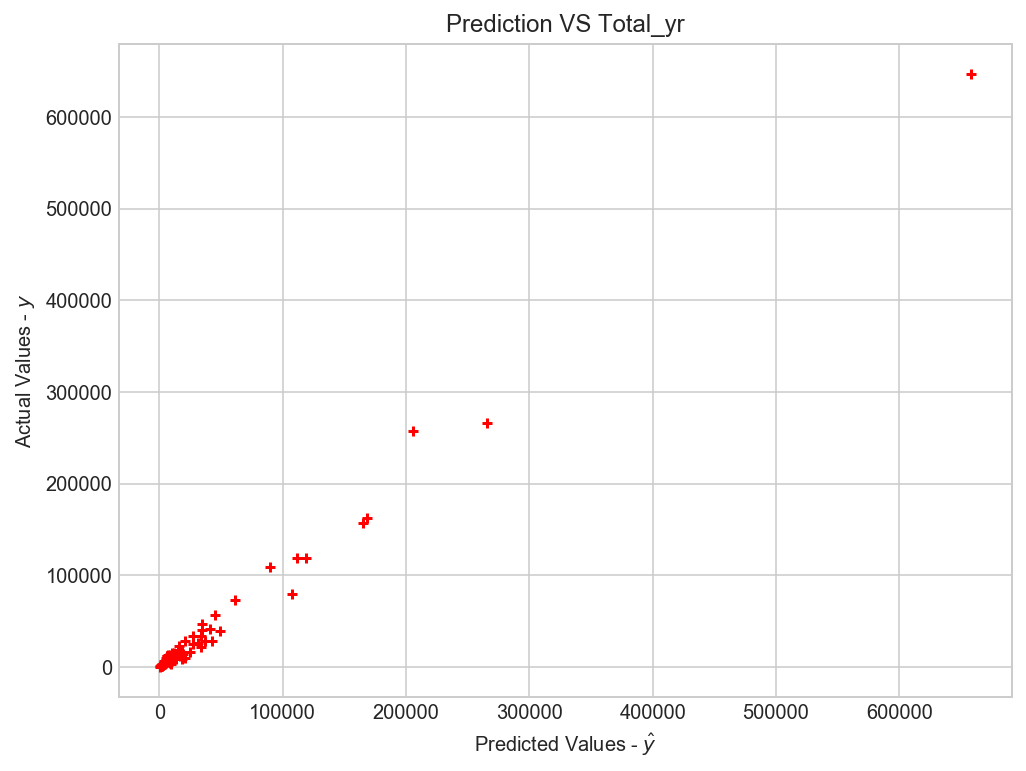

In [168]:
plt.figure(figsize=(8,6))   # 2nd model plot
plt.scatter(pred[0:100], y1[0:100], s=30, c='r', marker='+', zorder=10)
plt.title('Prediction VS Total_yr')
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

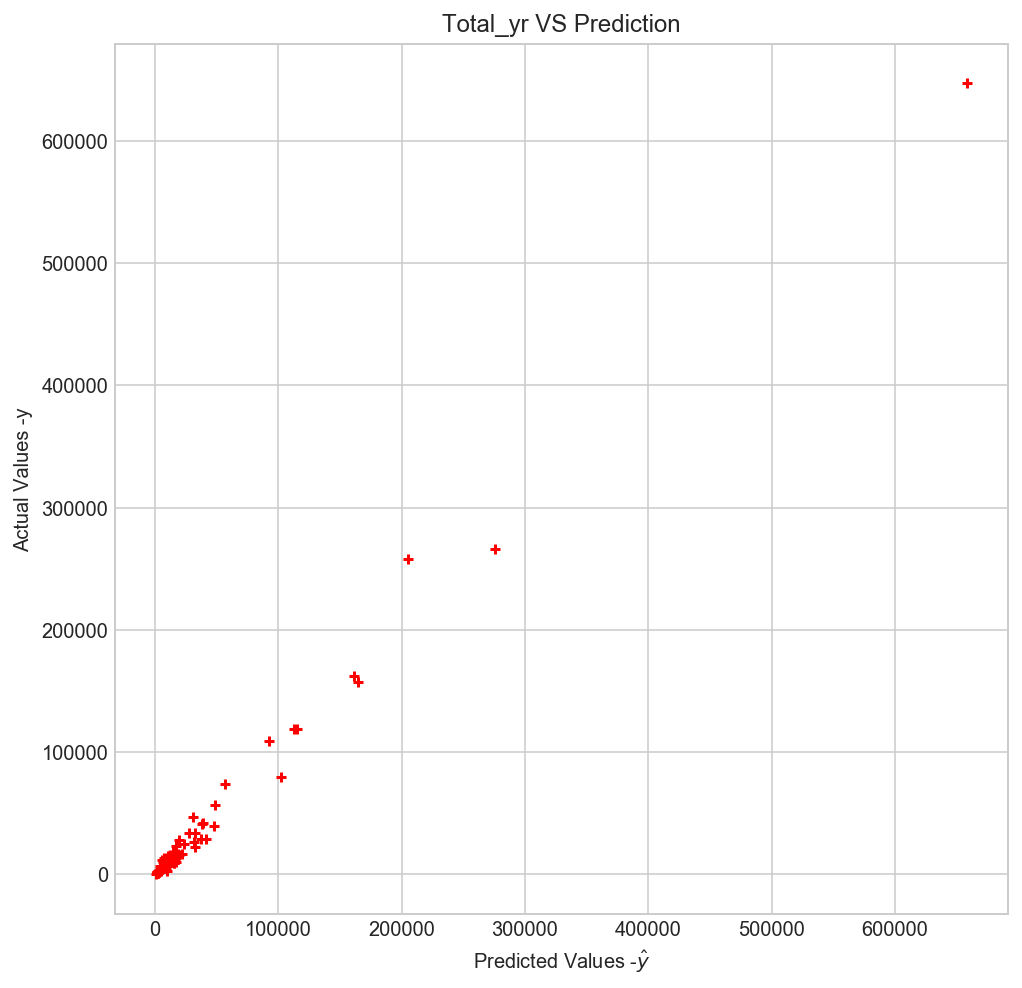

score:  0.990454280265


In [169]:
# Plot the model
plt.figure(figsize=(8,8))   # Third model plot
plt.scatter(preds[0:100], y2[0:100], s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values -$\hat{y}$")
plt.ylabel("Actual Values -y")
plt.title('Total_yr VS Prediction')

plt.show()

print("score: ", score)

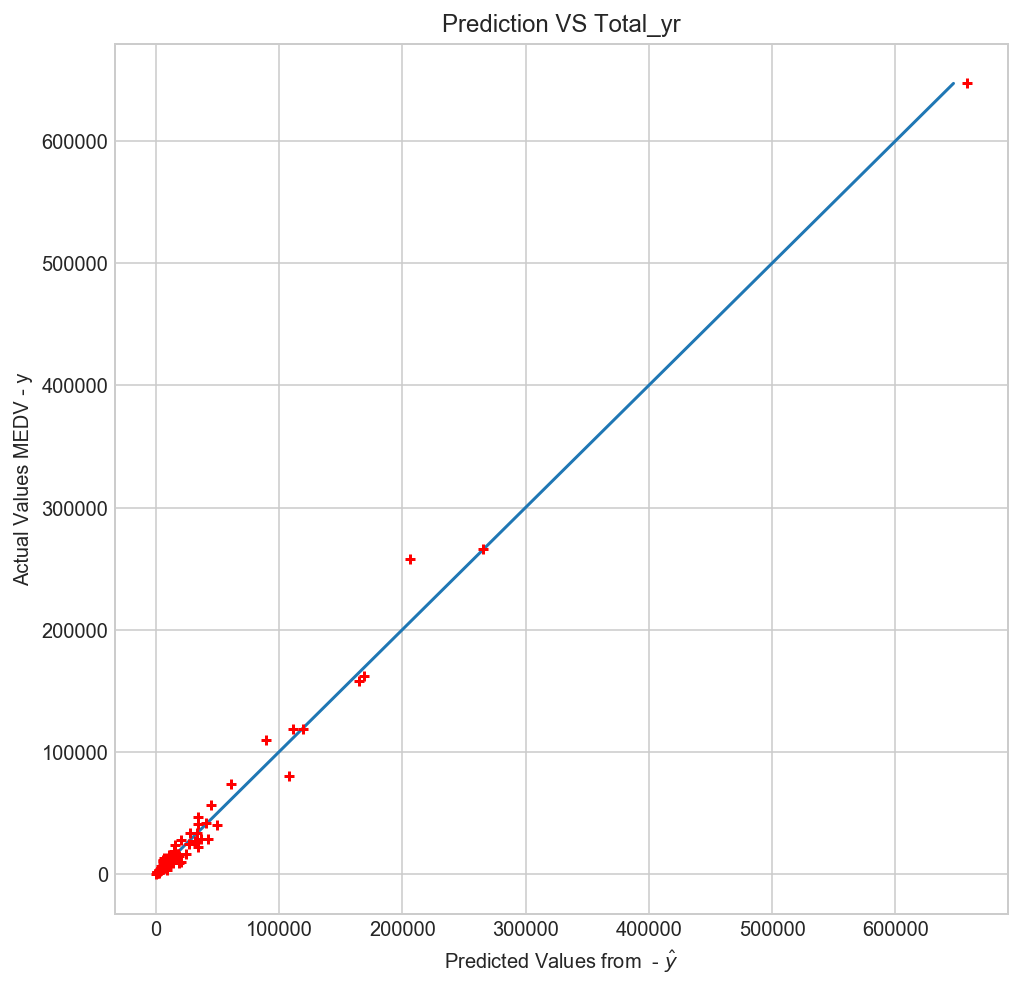

In [342]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(pred, y1, s=30, c='r', marker='+', zorder=10)
plt.title('Prediction VS Total_yr')
plt.xlabel("Predicted Values from  - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()


Text(0.5,1,'Total_yr VS Prediction')

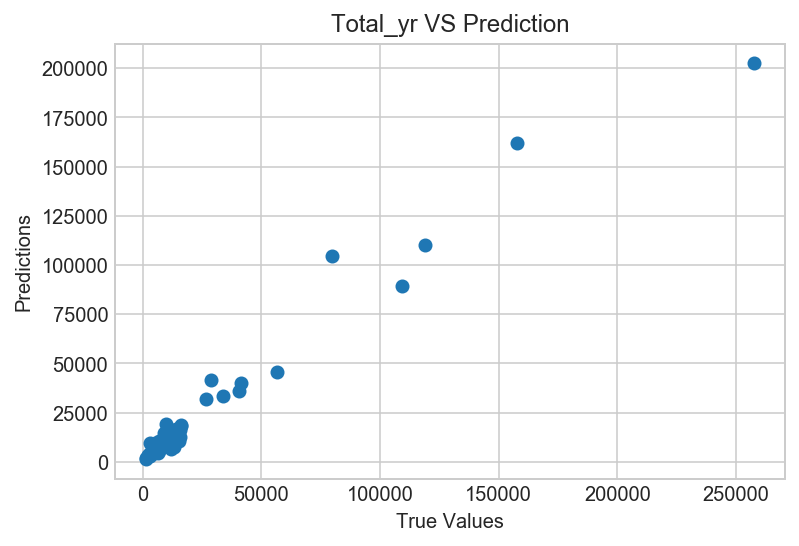

In [170]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Total_yr VS Prediction')

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

So after Data Cleaning/Munging and EDA which was thorough and having identified my predictors and target variables which are all continous, which was behind my choice of model, scikit-learn, statsmode and K-Folds Cross Validation in sklearn seem to be the best choice in the sense that Once a model is fit with statsmodels, you can print out a variety of summary statistics, metrics, and properties of the model using the model.summary() function. and i also want to see the R-squared, Number of observations, Coefficients for the variables and the intercept (const),
Standard errors of the coefficients, t-statistics, p-values, and confidence intervals.
looking at the limitations of my model i have some real doubt in my result due to errors in my model, my model seem to underpredict which I believe is as a result of strong correlation among the independent variables(predictors) of my choice. my training score is higher than my test score in most result, but they are some other things to also put in mind based on my coefficient of determination R2 which seem to be in the 90% range and also lower coefficients.